# Single Neuron

<div>
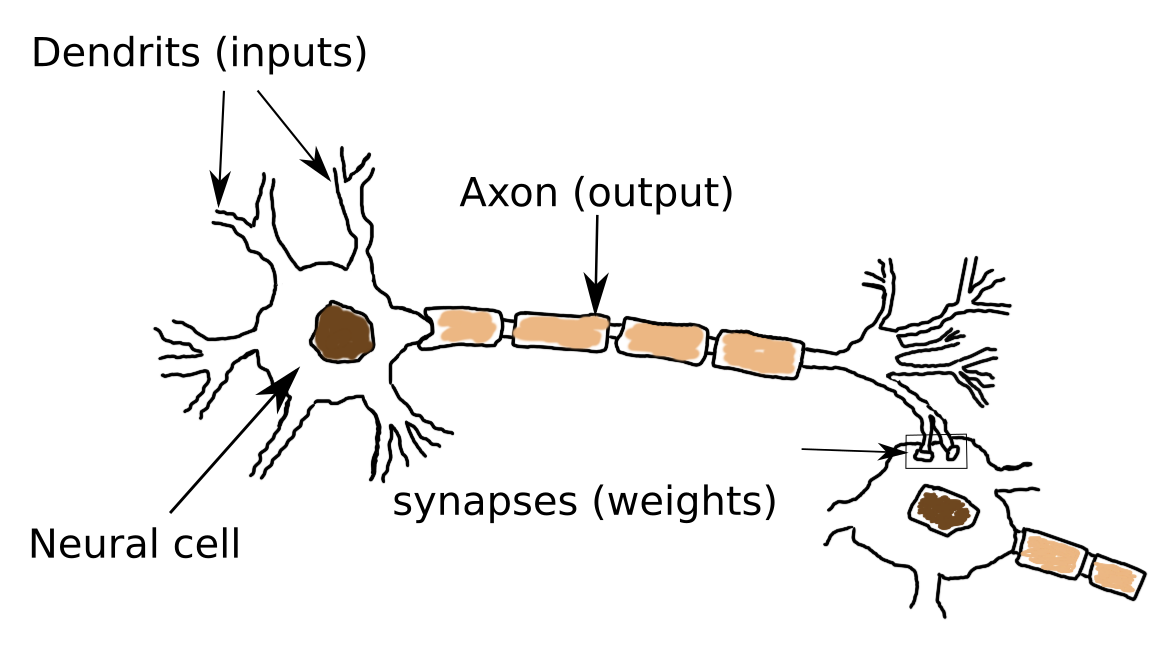
</div>

## Gradient Descent (GD) training algorithm

Due to non-linear transfer functions, such as logsig(), the single neuron model, Perceptron, needs to be optimized iteratively. The most famous training algorithm is the Gradient Descent (GD).

### Example: GD for classification

Import required packages

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import inv
from scipy.special import expit

print('scipy.special.expit is the logistic sigmoid function')
print('Done!')

Let's generate random points for two artificial normal distributed classes

In [ ]:
np.random.seed(13) # to always get the same points
N = 5
x_h = np.random.normal(1.1,0.3,N)
x_e = np.random.normal(1.9,0.4,N)
x_e = np.append(x_e, [4.9]) # add giant elf
plt.plot(x_h,np.zeros([N,1]),'co', label="hobbit")
plt.plot(x_e,np.zeros([N+1,1]),'mo', label="elf")
plt.title('Training samples from two different classes c1 ja c2')
plt.legend()
plt.xlabel('height [m]')
plt.axis([0.5,5.0,-1.1,+1.1])
plt.show()

Let's add corresponding class values for $y$ to represent class hobbit (y = 0) and elf (y = 1)

In [ ]:
y_h = np.zeros(N)
y_h[:] = 0.0
y_e = np.zeros(N+1)
y_e[:] = +1.0
plt.plot(x_h,y_h,'co', label="hobbit")
plt.plot(x_e,y_e,'mo', label="elf")
plt.title('Training samples from two different classes c1 ja c2')
plt.legend()
plt.xlabel('height [m]')
plt.ylabel('y [class id]')
plt.axis([0.5,5.0,-0.1,+1.1])
plt.show()

Let's form the training dataset that consits of hobbit and elf samples and their label index.

In [ ]:
x_tr = np.concatenate((x_h,x_e))
y_tr = np.concatenate((y_h,y_e))
print(f'The size of x is {x_tr.size}')
print(f'The size of y is {y_tr.size}')

Let's initial GD

In [ ]:
a_t = 0
b_t = 0
num_of_epochs = 100
learning_rate = 0.1
print('Done!')

Initial MSE

In [ ]:
y_pred = expit(a_t*x_tr+b_t)
MSE = np.sum((y_tr-y_pred)**2)/(N+1)
plt.title(f'Epoch=0 a={a_t:.2f} b={b_t:.2f} MSE={MSE:.2f}')
plt.plot(x_h,y_h,'co', label="hobbit")
plt.plot(x_e,y_e,'mo', label="elf")
x = np.linspace(0.0,+5.0,50)
plt.plot(x,expit(a_t*x+b_t),'b-',label='y=logsig(ax+b)')
plt.xlabel('height [m]')
plt.axis([0.5,5.0,-0.1,+1.1])
plt.legend()
plt.show()

Let's run GD for the required number of epochs

In [ ]:
for e in range(1,num_of_epochs):
    grad_a = np.sum(2*x_tr*(y_tr-expit(a_t*x_tr+b_t))*expit(a_t*x_tr+b_t)*(-1+expit(a_t*x_tr+b_t)))
    grad_b = np.sum(2*(y_tr-expit(a_t*x_tr+b_t))*expit(a_t*x_tr+b_t)*(-1+expit(a_t*x_tr+b_t)))
    a_t = a_t-learning_rate*grad_a
    b_t = b_t-learning_rate*grad_b
    if np.mod(e,20) == 0 or e == 1: # Plot after every 20th epoch
        # Compute train error
        y_pred = expit(a_t*x_tr+b_t)
        MSE = np.sum((y_tr-y_pred)**2)/(N+1)
        plt.title(f'Epoch={e} a={a_t:.2f} b={b_t:.2f} MSE={MSE:.2f}')
        plt.plot(x_h,y_h,'co', label="hobbit")
        plt.plot(x_e,y_e,'mo', label="elf")
        x = np.linspace(0.0,+5.0,50)
        plt.plot(x,expit(a_t*x+b_t),'b-',label='y=logsig(ax+b)')
        plt.plot([0.5, 5.0],[0.5,0.5],'k--',label='y=0 (class boundary)')
        plt.xlabel('height [m]')
        plt.axis([0.5,5.0,-0.1,+1.1])
        plt.legend()
        plt.show()

### Homework: Implement the GD for a regression problem: Estimation of hobbit weight given its height.

In [ ]:
np.random.seed(42) # to always get the same points
N = 50 
x = np.random.normal(1.1,0.3,N)
a_gt = 50.0
b_gt = 20.0
y_noise =  np.random.normal(0,8,N)
y = a_gt*x+b_gt+y_noise
plt.plot(x,y,'bo')
plt.title('Data for the regression homework')
plt.xlabel('height [m]')
plt.ylabel('weight [kg]')
plt.axis([0,2,0,150])
plt.show()

## References

C.M. Bishop (2006): Pattern Recognition and Machine Learning, Chapters 3 and 4 ([PDF](https://www.microsoft.com/en-us/research/uploads/prod/2006/01/Bishop-Pattern-Recognition-and-Machine-Learning-2006.pdf)) - Bishop provides one of the best and most detailed but still elementary treatise of linear regression and classification.